In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [4]:
test_df = pd.read_csv('test.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [6]:
train_df.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


In [7]:
train_df.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [8]:
train_df = train_df.drop(["customer_id","name"],axis="columns")

In [9]:
train_df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [10]:
train_df.owns_car.value_counts()

owns_car
N    29743
Y    15238
Name: count, dtype: int64

In [11]:
cols = train_df.columns 

for i in cols:
    if len(train_df[i].value_counts())<=20:
        print("Column Name:",i)
        print(train_df[i].value_counts())
        print("*"*50)

Column Name: gender
gender
F      29957
M      15570
XNA        1
Name: count, dtype: int64
**************************************************
Column Name: owns_car
owns_car
N    29743
Y    15238
Name: count, dtype: int64
**************************************************
Column Name: owns_house
owns_house
Y    31642
N    13886
Name: count, dtype: int64
**************************************************
Column Name: no_of_children
no_of_children
0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
7.0        1
8.0        1
9.0        1
Name: count, dtype: int64
**************************************************
Column Name: occupation_type
occupation_type
Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff     

In [12]:
train_df['gender'] = train_df['gender'].apply(lambda x: 'M' if x=='XNA' else x)
train_df['gender'].value_counts()

gender
F    29957
M    15571
Name: count, dtype: int64

In [13]:
# fill no_of_children with mode of the data
train_df['no_of_children'].fillna(train_df['no_of_children'].mode()[0], inplace=True)

# fill owns_car with mode of the data
train_df['owns_car'].fillna(train_df['owns_car'].mode()[0], inplace=True)

# fill no_of_days_employed with median of the data
train_df['no_of_days_employed'].fillna(train_df['no_of_days_employed'].median(), inplace=True)


In [14]:
# fillna wrt to their medians and modes
train_df['total_family_members'].fillna(train_df['total_family_members'].mode()[0], inplace=True)
train_df['migrant_worker'].fillna(train_df['migrant_worker'].mode()[0], inplace=True)
train_df['yearly_debt_payments'].fillna(train_df['yearly_debt_payments'].median(), inplace=True)
train_df['credit_score'].fillna(train_df['credit_score'].median(), inplace=True)

In [15]:
train_df.isna().sum()

age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [16]:
train_df.duplicated().sum()

0

In [17]:
train_df.isna().sum()

age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

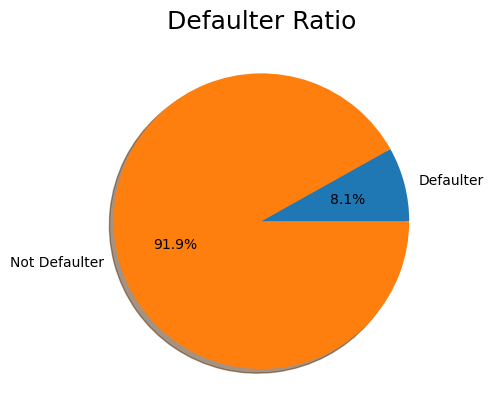

In [18]:
# Ploting Credit_default ratio
total_default_values = train_df.credit_card_default.value_counts(ascending=True).values

plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Not Defaulter'], autopct='%1.1f%%', shadow=True)
plt.title('Defaulter Ratio', fontsize=18)
plt.show()

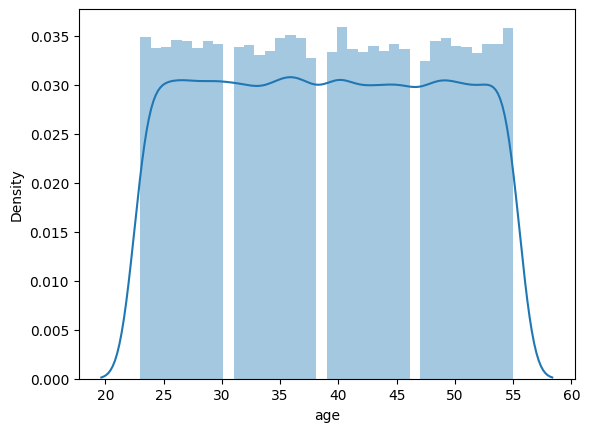

In [19]:
# visualize AGE feature - distplot
import seaborn as sns
plt.figure()
sns.distplot(train_df['age'])
plt.show()

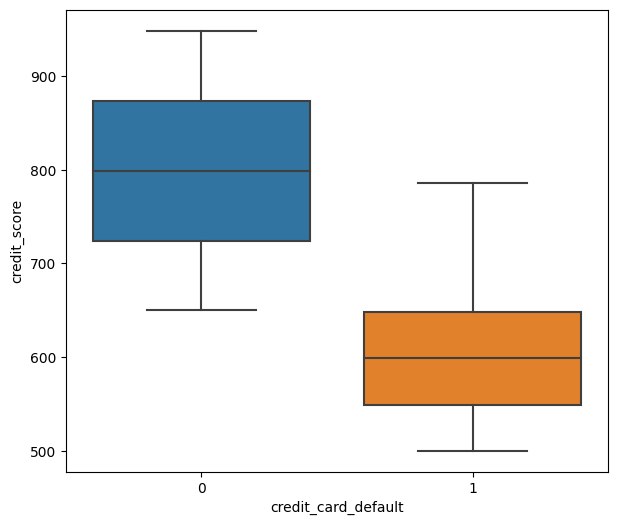

In [20]:
plt.figure(figsize=[7,6])
sns.boxplot(x=train_df['credit_card_default'], y=train_df['credit_score'])
plt.show()

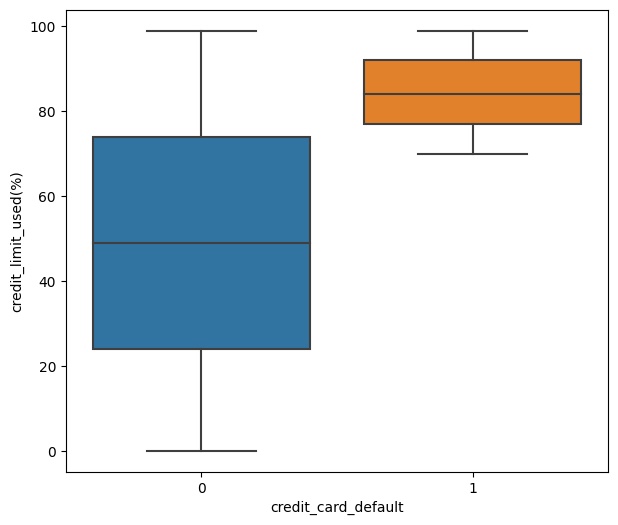

In [21]:
# boxplot of credit_defaulter-credit_limit_utilization
plt.figure(figsize=[7,6])
sns.boxplot(x=train_df['credit_card_default'], y =train_df['credit_limit_used(%)'])
plt.show()

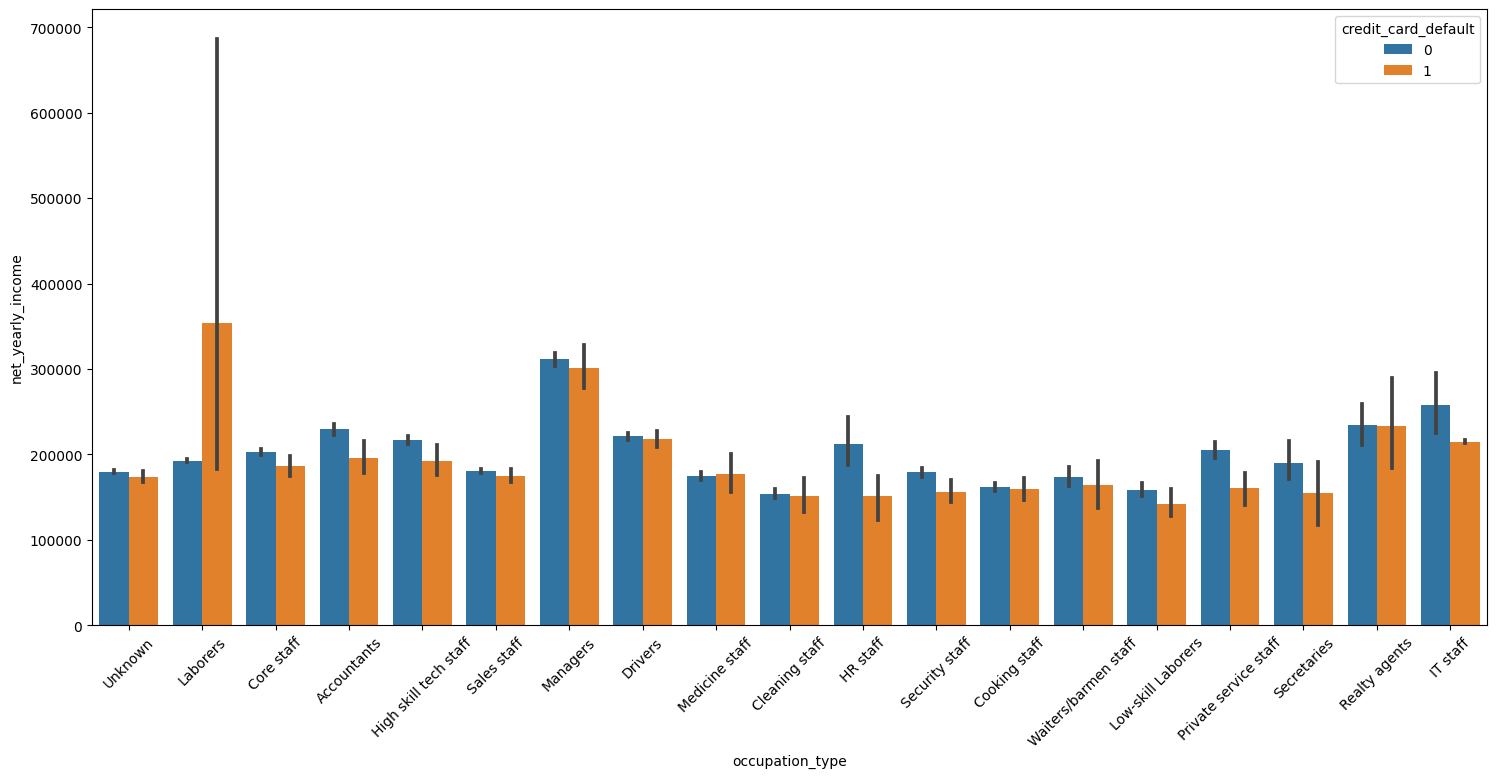

In [22]:
# barplots for occupation types wrt credit_default
plt.figure(figsize=[18,8])
sns.barplot(x=train_df['occupation_type'], y=train_df['net_yearly_income'], hue=train_df['credit_card_default'])
plt.xticks(rotation=45)
plt.show()

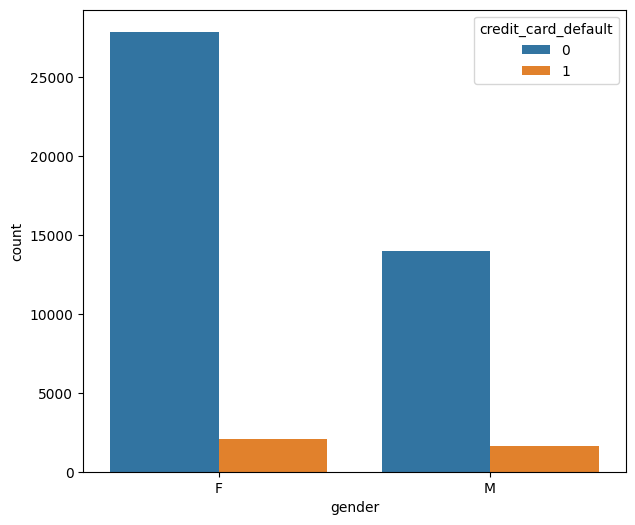

In [23]:
plt.figure(figsize=[7,6])
sns.countplot(x=train_df['gender'], hue=train_df['credit_card_default'])
plt.show()

In [24]:

import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

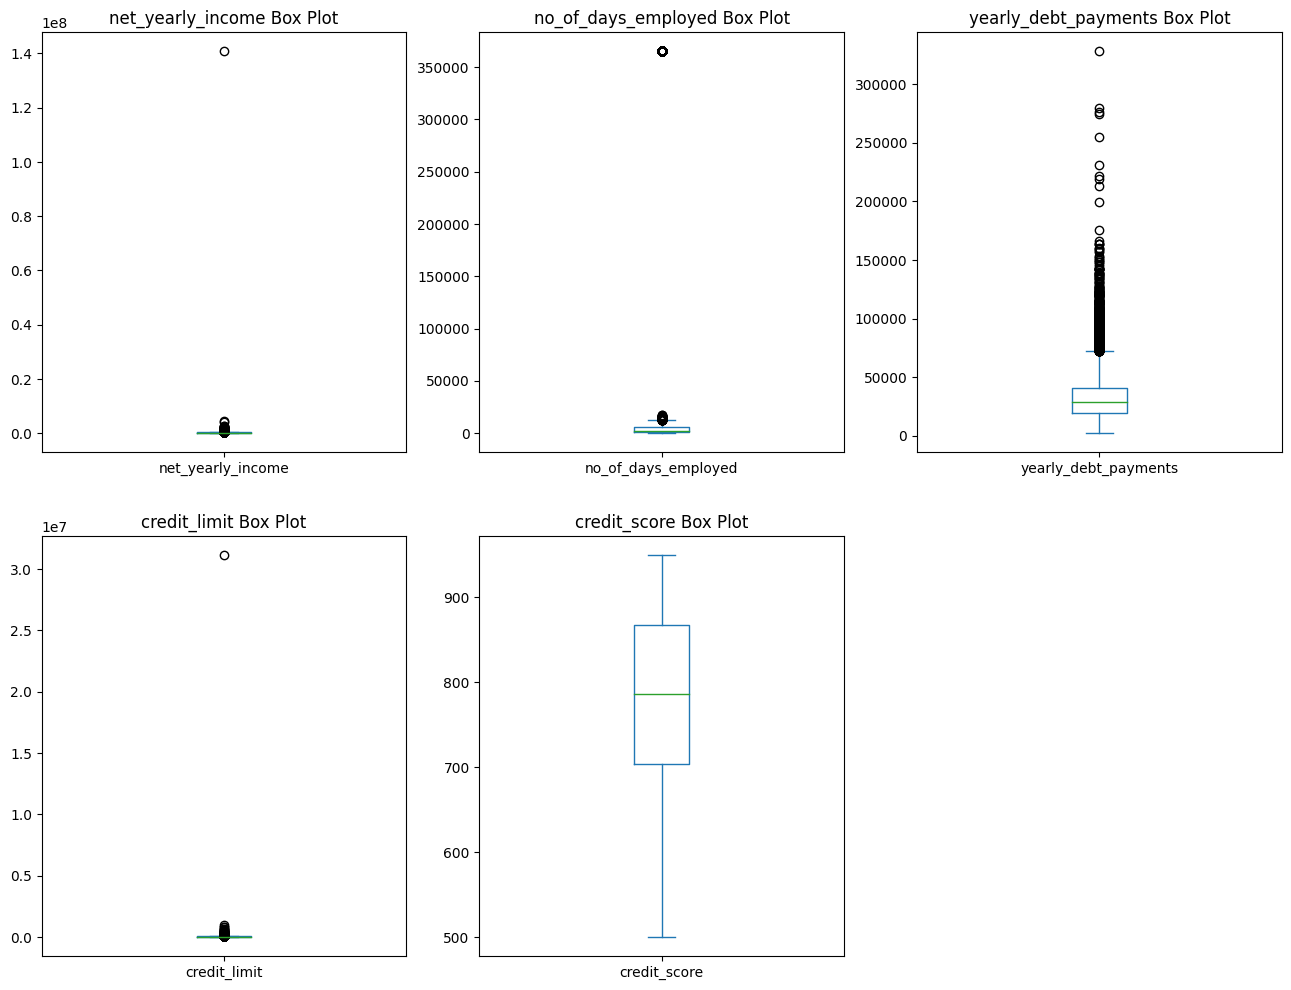

In [25]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
train_df['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
train_df['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
train_df['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
train_df['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
train_df['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

In [26]:
train_df['net_yearly_income'].quantile([0.25, 0.5, 0.75, 0.99, 0.998, 1.0])

0.250    1.263458e+05
0.500    1.717149e+05
0.750    2.406038e+05
0.990    5.779015e+05
0.998    9.060748e+05
1.000    1.407590e+08
Name: net_yearly_income, dtype: float64

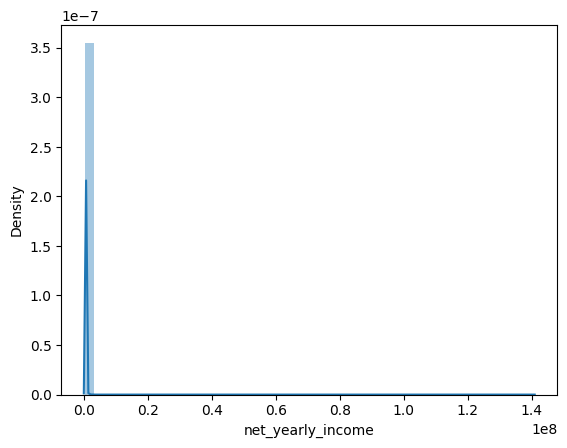

In [27]:
# net_yearly_income distribution plot
sns.distplot(train_df['net_yearly_income'])
plt.show()

In [28]:
train_df[train_df['net_yearly_income']>train_df['net_yearly_income'].quantile(0.998)].credit_card_default.value_counts()    


credit_card_default
0    86
1     6
Name: count, dtype: int64

In [29]:
train_df = train_df[train_df['net_yearly_income']<=train_df['net_yearly_income'].quantile(0.998)]

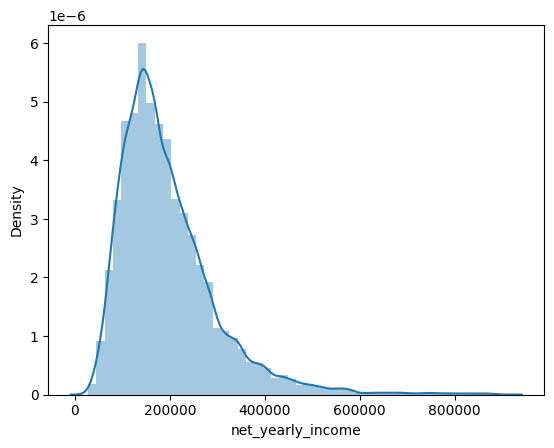

In [30]:
# net_yearly_income distribution plot
sns.distplot(train_df['net_yearly_income'])
plt.show()

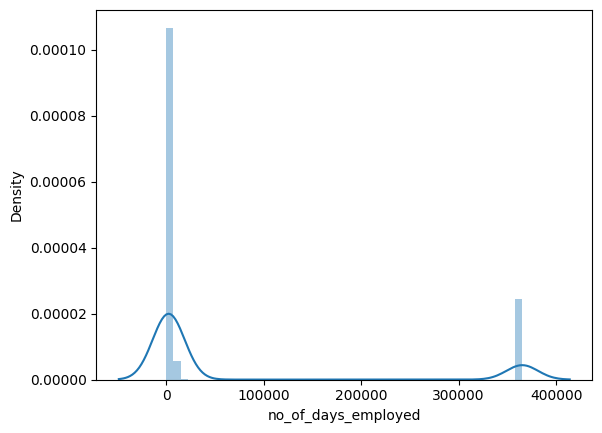

In [31]:
sns.distplot(train_df['no_of_days_employed'])
plt.show()

In [32]:
train_df['no_of_days_employed'].quantile([0.25, 0.5, 0.75, 0.8185, 0.850, 1.0])

0.2500       946.0000
0.5000      2224.0000
0.7500      5702.2500
0.8185     12876.5475
0.8500    365242.0000
1.0000    365252.0000
Name: no_of_days_employed, dtype: float64

In [33]:
train_df = train_df[train_df['no_of_days_employed']<=train_df['no_of_days_employed'].quantile(0.8185)]


In [34]:
train_df.shape

(37189, 17)

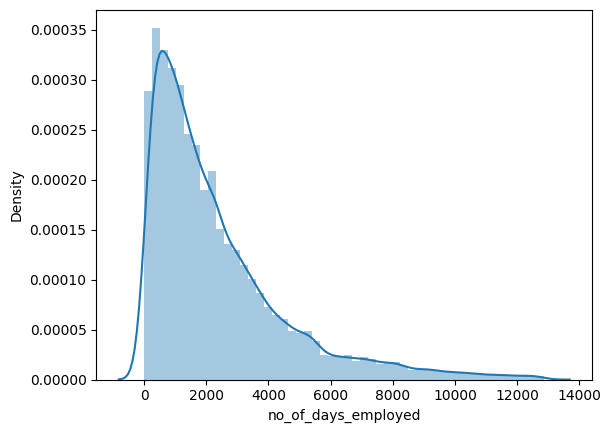

In [35]:
sns.distplot(train_df['no_of_days_employed'])
plt.show()

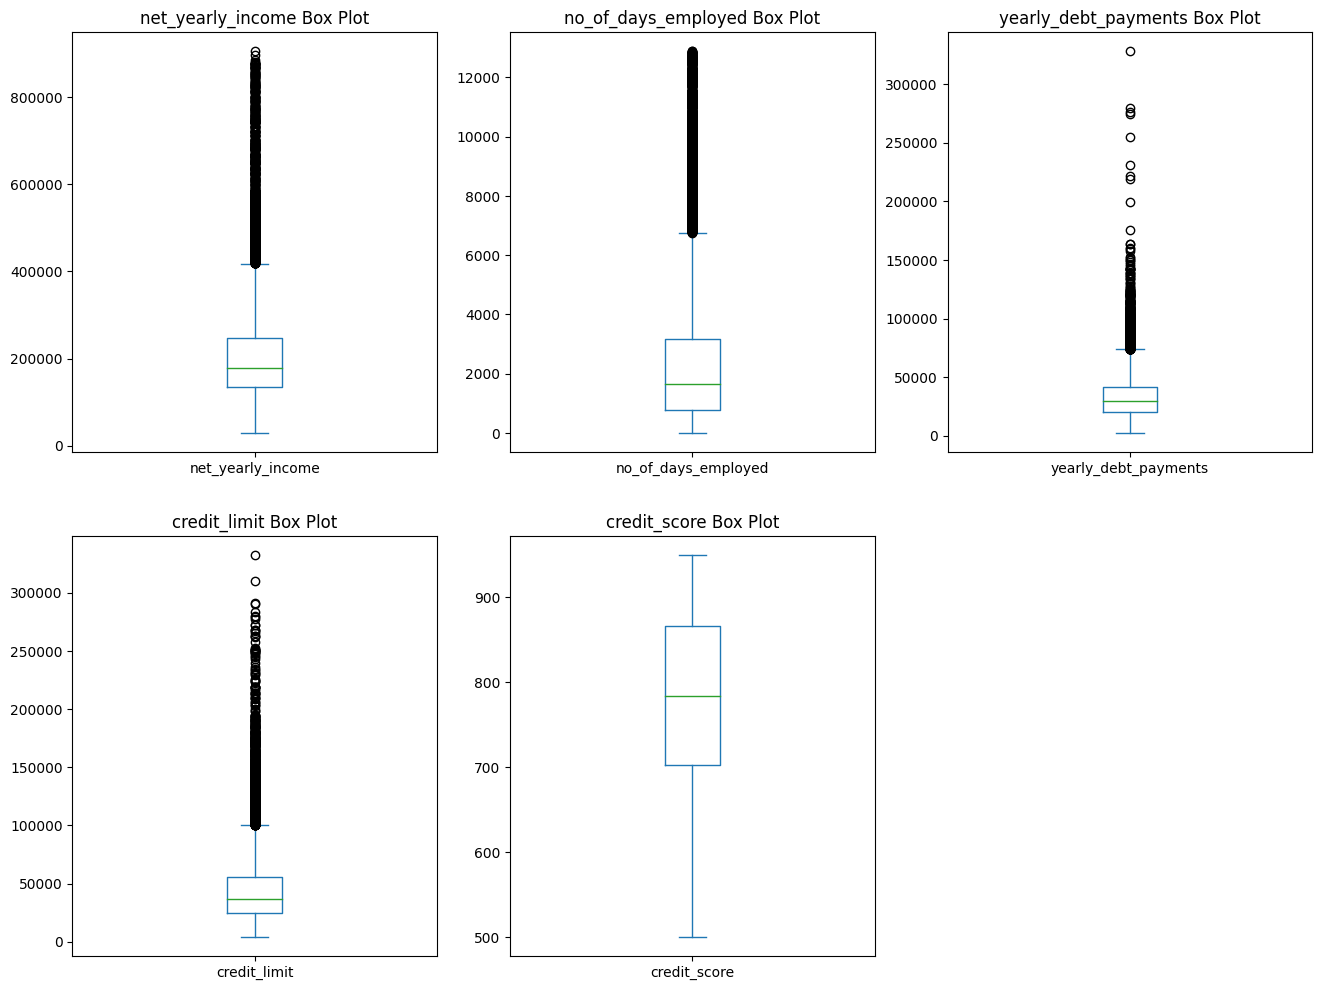

In [36]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
train_df['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
train_df['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
train_df['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
train_df['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
train_df['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

In [37]:
lm = LabelEncoder()

# get categorical columns
cat_cols = train_df.select_dtypes(include=['object']).columns

# encode labels for categorical columns
for i in cat_cols:
    train_df[i] = lm.fit_transform(train_df[i])
    
train_df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,0,0,1,0.0,107934.04,612.0,17,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,1,0,1,0.0,109862.62,2771.0,8,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,1,0,1,0.0,230153.17,204.0,8,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,0,0,1,0.0,122325.82,11941.0,3,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,1,1,1,0.0,387286.00,1459.0,3,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [38]:
# split train-test data
X = train_df.drop(['credit_card_default'], axis=1)
y = train_df['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)

print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (26032, 16) (11157, 16)
y= (26032,) (11157,)


In [39]:
# scaling the features to standardize
scaler = StandardScaler()

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [40]:
# initialize SMOTE method
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [41]:
y_train.value_counts()

credit_card_default
0    23758
1    23758
Name: count, dtype: int64

In [42]:
X_train = pd.DataFrame(data=X_train, columns=cols)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.shape: (47516, 16)
y_train.shape: (47516,)


,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,0.211774,-0.777011,-0.760378,-1.466304,-0.651997,-1.039465,-0.894304,-0.263107,-0.273073,-0.527693,-0.269417,-0.588263,-1.714596,1.469990,-0.237277,-0.238944
1,0.942915,-0.777011,-0.760378,0.681987,-0.651997,-0.549884,1.943260,-0.263107,-0.273073,-0.527693,-0.191814,-0.825633,1.279275,0.434347,-0.237277,-0.238944
2,0.838466,1.286984,-0.760378,-1.466304,-0.651997,-0.876644,-0.864886,-0.263107,-1.331692,-0.527693,-0.663947,-0.859380,-0.217661,0.473800,-0.237277,-0.238944
3,-0.414918,1.286984,-0.760378,0.681987,-0.651997,1.795084,0.170562,0.115344,-0.273073,-0.527693,0.699454,0.713200,-1.374383,0.917647,-0.237277,-0.238944
4,-1.250507,1.286984,-0.760378,-1.466304,-0.651997,-0.614647,-0.834130,-0.263107,-0.273073,1.895041,-1.215183,-0.508613,0.496786,1.302314,-0.237277,-0.238944


In [43]:
# initialize LogisticRegression and fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [47]:
# evaluation function
def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Accuracy of TRAIN data:", 100*accuracy_score(y_train, y_train_pred))
    print("F1_Score of TRAIN data:", 100*f1_score(y_train, y_train_pred, average="macro"))
    print("="*50)
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy of TEST data:", 100*accuracy_score(y_test, y_test_pred))
    print("F1_Score of TEST data:", 100*f1_score(y_test, y_test_pred, average="macro"))
    print("="*50)
    
    # Plot ROC_AUC Curve
  
    plt.title('ROC_AUC Curve', fontsize=16)
    plt.show()

[[22619  1139]
 [  649 23109]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     23758
           1       0.95      0.97      0.96     23758

    accuracy                           0.96     47516
   macro avg       0.96      0.96      0.96     47516
weighted avg       0.96      0.96      0.96     47516

Accuracy of TRAIN data: 96.23705699132924
F1_Score of TRAIN data: 96.23665678289173
[[9687  495]
 [  50  925]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     10182
           1       0.65      0.95      0.77       975

    accuracy                           0.95     11157
   macro avg       0.82      0.95      0.87     11157
weighted avg       0.96      0.95      0.96     11157

Accuracy of TEST data: 95.11517433001703
F1_Score of TEST data: 87.25408887204034


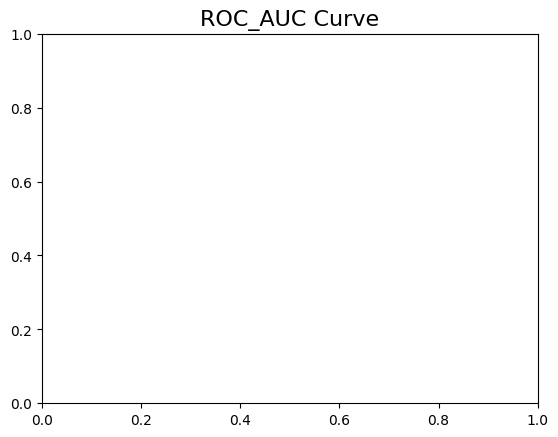

In [67]:
evaluation(logreg)

Text(0, 0.5, 'Error Rate')

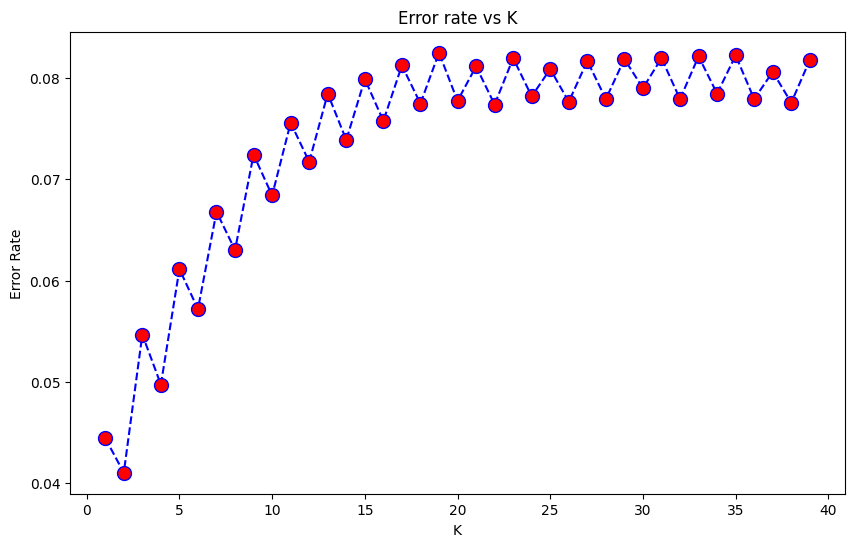

In [45]:
# iterating knn model for all values of k from 1-39
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
# ploting the error_rate

plt.figure(figsize=[10,6])
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

[[22245  1513]
 [   34 23724]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     23758
           1       0.94      1.00      0.97     23758

    accuracy                           0.97     47516
   macro avg       0.97      0.97      0.97     47516
weighted avg       0.97      0.97      0.97     47516

Accuracy of TRAIN data: 96.74425456688273
F1_Score of TRAIN data: 96.74109717846915
[[9461  721]
 [ 103  872]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     10182
           1       0.55      0.89      0.68       975

    accuracy                           0.93     11157
   macro avg       0.77      0.91      0.82     11157
weighted avg       0.95      0.93      0.93     11157

Accuracy of TEST data: 92.61450210630098
F1_Score of TEST data: 81.86988776148677


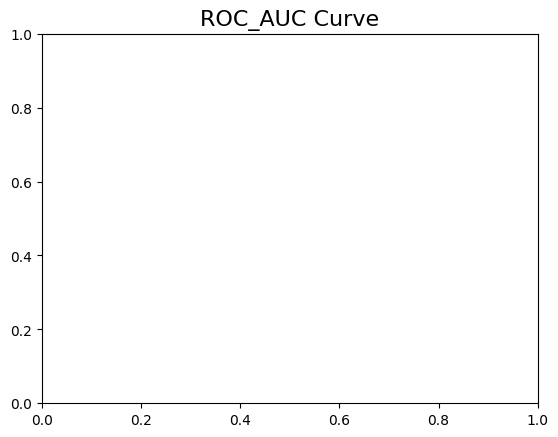

In [48]:
# building knn and fit the model
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
# Evaluation
evaluation(knn)

In [49]:
grid_search=0
params = {
    'max_depth':[30],
   'min_samples_leaf': [10, 30, 50],
    'max_features': [15, 16],
    'n_estimators': [30, 50]
  }

rfm_basic = RandomForestClassifier(random_state=42, oob_score=True)

grid_search = GridSearchCV(estimator=rfm_basic, param_grid=params,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [50]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [30], 'max_features': [15, 16],
                         'min_samples_leaf': [10, 30, 50],
                         'n_estimators': [30, 50]},
             scoring='accuracy', verbose=1)

In [51]:
rfm_best = grid_search.best_estimator_
rfm_best

RandomForestClassifier(max_depth=30, max_features=16, min_samples_leaf=10,
                       n_estimators=30, oob_score=True, random_state=42)

[[23194   564]
 [   73 23685]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     23758
           1       0.98      1.00      0.99     23758

    accuracy                           0.99     47516
   macro avg       0.99      0.99      0.99     47516
weighted avg       0.99      0.99      0.99     47516

Accuracy of TRAIN data: 98.65939893930465
F1_Score of TRAIN data: 98.6592557768384
[[9836  346]
 [  63  912]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     10182
           1       0.72      0.94      0.82       975

    accuracy                           0.96     11157
   macro avg       0.86      0.95      0.90     11157
weighted avg       0.97      0.96      0.97     11157

Accuracy of TEST data: 96.3341400017926
F1_Score of TEST data: 89.82354112508023


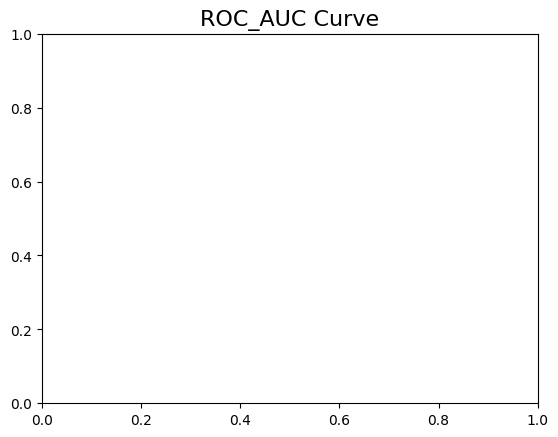

In [52]:
evaluation(rfm_best)

In [53]:
test_df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [54]:
test_df.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   132
owns_house                   0
no_of_children             190
net_yearly_income            0
no_of_days_employed        105
occupation_type              0
total_family_members        31
migrant_worker              26
yearly_debt_payments        22
credit_limit                 0
credit_limit_used(%)         0
credit_score                 3
prev_defaults                0
default_in_last_6months      0
dtype: int64

In [55]:
# fill no_of_children with mode of the data
test_df['no_of_children'].fillna(test_df['no_of_children'].mode()[0], inplace=True)

# fill owns_car with mode of the data
test_df['owns_car'].fillna(test_df['owns_car'].mode()[0], inplace=True)

# fill no_of_days_employed with median of the data
test_df['no_of_days_employed'].fillna(test_df['no_of_days_employed'].median(), inplace=True)

In [56]:
test_df['migrant_worker'].fillna(test_df['migrant_worker'].mode()[0],inplace = True)
test_df['total_family_members'].fillna(test_df['total_family_members'].mode()[0],inplace = True)
test_df['yearly_debt_payments'].fillna(test_df['yearly_debt_payments'].median(),inplace = True)


In [57]:
test_df.isna().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               3
prev_defaults              0
default_in_last_6months    0
dtype: int64

In [58]:
test_df['credit_score'].fillna(test_df['credit_score'].median(),inplace=True)

In [59]:
test_df['gender'] = test_df['gender'].apply(lambda x: 'F' if x=='XNA' else x)
test_df['gender'].value_counts()

gender
F    7444
M    3939
Name: count, dtype: int64

In [61]:
# get the cutomer_id column to new dataframe and drop in the original data fram
final_df = pd.DataFrame(test_df.customer_id)

In [62]:
test_df.drop(['customer_id','name'],axis=1,inplace=True)

In [63]:
test_df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [64]:
# get categorical columns
cat_cols_test = test_df.select_dtypes(include=['object']).columns

# encode labels for categorical columns
for i in cat_cols_test:
    test_df[i] = lm.fit_transform(test_df[i])
    
test_df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,52,0,1,0,0.0,232640.53,998.0,17,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,48,0,0,0,1.0,284396.79,1338.0,17,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,50,0,0,0,1.0,149419.28,1210.0,17,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,30,0,0,0,1.0,160437.54,503.0,8,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,52,1,0,1,0.0,233480.37,157.0,8,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [66]:
cols_test = test_df.columns

test_df[cols_test] = scaler.transform(test_df[cols_test])
test_df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,1.360709,-0.777011,1.315135,-1.466304,-0.651997,0.284765,-0.605912,1.439924,-0.273073,-0.527693,-1.047637,-0.631917,-1.646553,-0.019363,-0.237277,-0.238944
1,0.942915,-0.777011,-0.760378,-1.466304,0.660670,0.783614,-0.454362,1.439924,0.785547,-0.527693,1.445414,0.905194,0.598850,0.246945,-0.237277,-0.238944
2,1.151812,-0.777011,-0.760378,-1.466304,0.660670,-0.517357,-0.511416,1.439924,0.785547,-0.527693,-0.630658,-0.680287,0.632871,-2.495042,7.038086,-0.238944
3,-0.937161,-0.777011,-0.760378,-1.466304,0.660670,-0.411158,-0.826552,-0.263107,-0.273073,1.895041,-0.203523,-0.535835,-1.476447,0.335715,-0.237277,-0.238944
4,1.360709,1.286984,-0.760378,0.681987,-0.651997,0.292860,-0.980778,-0.263107,-0.273073,1.895041,1.256364,1.387708,1.007105,-1.656664,3.400405,4.185085


In [68]:
predicted_output = rfm_best.predict(test_df)

In [70]:
predicted_output[:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)